# 1.. Why Data Cleaning is Critical (Traditional vs GenAI)

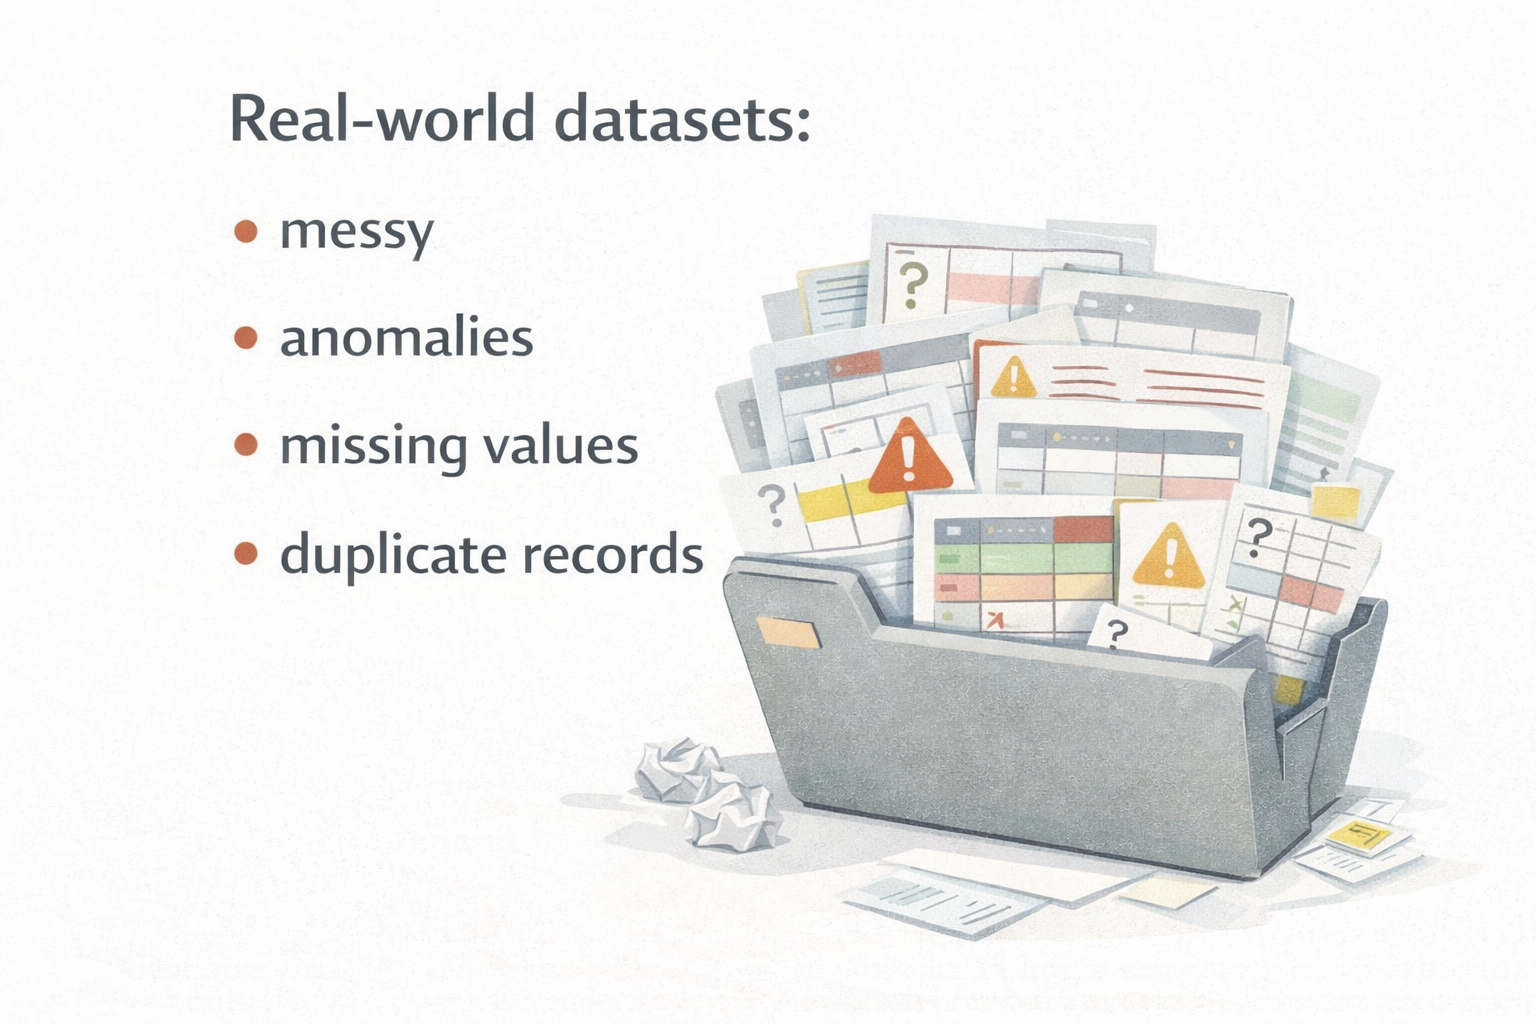

In [ ]:
'''


See Real-world datasets are messy , they have anomalies , missing values , duplicate records etc..
& if you analyse such messy data , you would have improper conclusions !




'''

In [ ]:
'''

Why to do Data Cleaning ?

🔴 1️⃣ Wrong Conclusions



If missing values or errors are present:

Example:
You have Salary data of 10K employees of Amazon
If many salary values are missing and treated as 0,
the average salary will look much lower than reality.

📉 You conclude: “Employees are underpaid”
But actually → Data was incomplete.




Imagine you have Duplicate rows in your sales data of Amazon :

A customer appears twice in sales data
→ Revenue looks higher than actual 💰

Manager thinks business is growing
Reality: It’s just duplicate records



If you skip data cleaning, your analysis may look professional but be completely wrong.

So Data cleaning is not optional — it is the foundation of correct analysis.



💡 One-Line Rule

🧹 Clean Data → Correct Insights
🗑️ Dirty Data → Dangerous Decisions



'''

In [ ]:
'''


See in Traditional Data cleaning  , what we do all these things manually in Data Cleaning :
    we check missing values
    we check whether data types are correct or not
    we check whether we have duplicate rows or not 
    we check whether there are Outliers(extreme) value present in data or not !
    
        
    It is manual, time-consuming, and easy to make mistakes especially with large datasets..
        
        

    But in GenAI powered Data cleaning = AI suggests data cleaning tips + issues + fixes


    & this will lot of time for Data Analyst..


'''

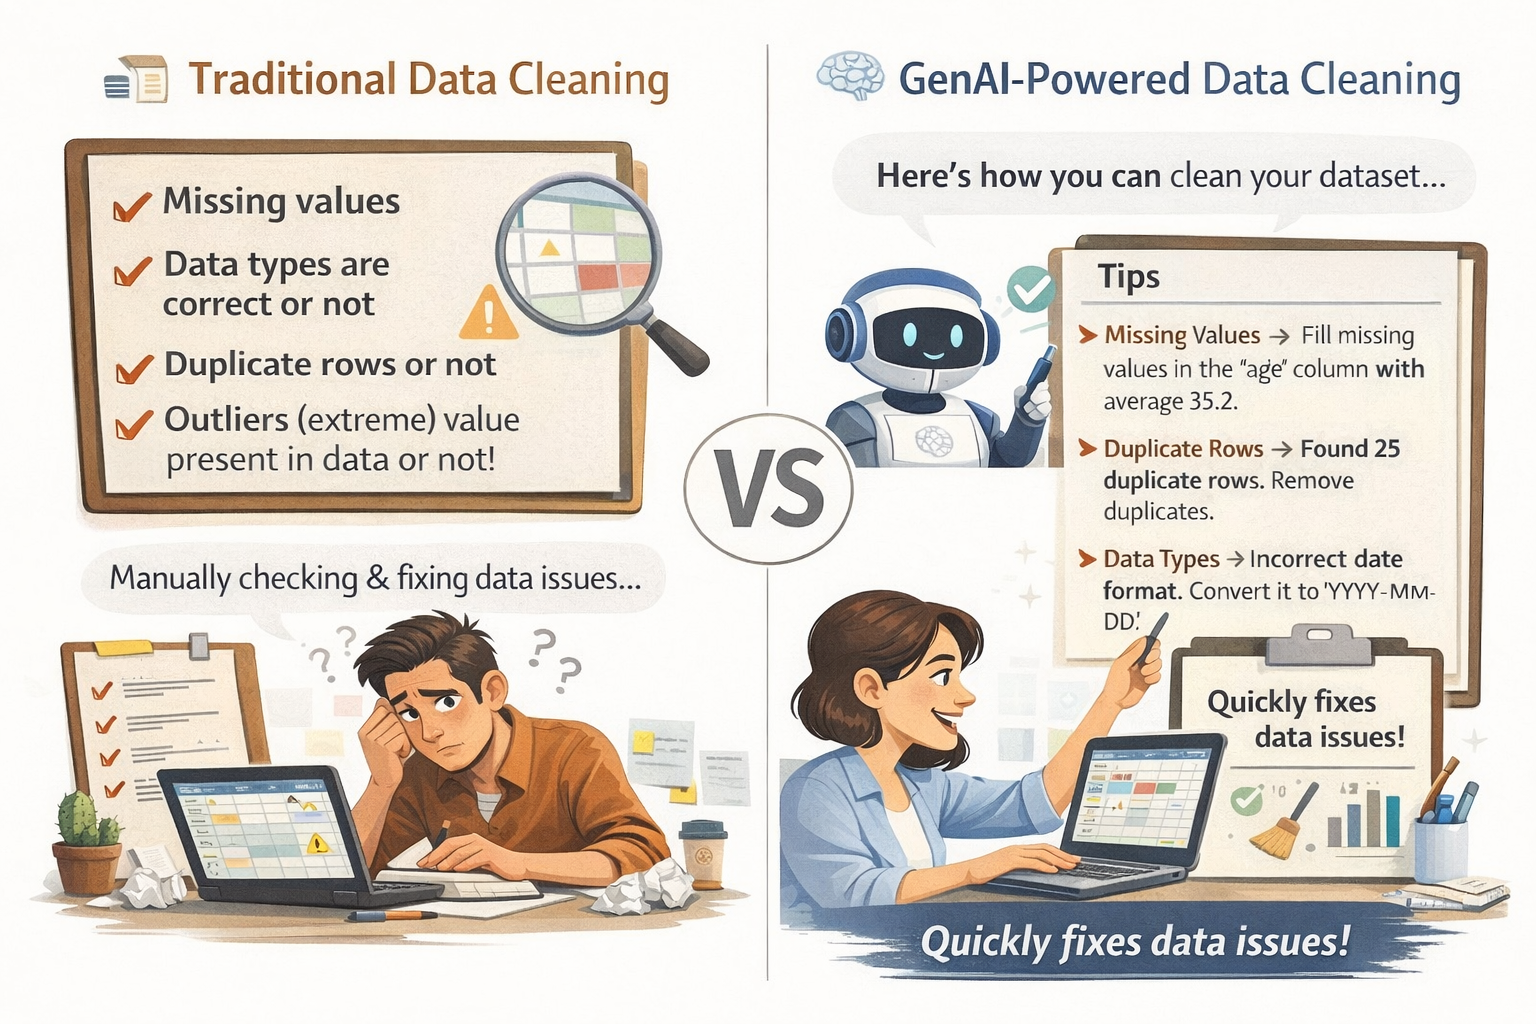

# 2.. Missing Values Strategies (AI Suggested) !

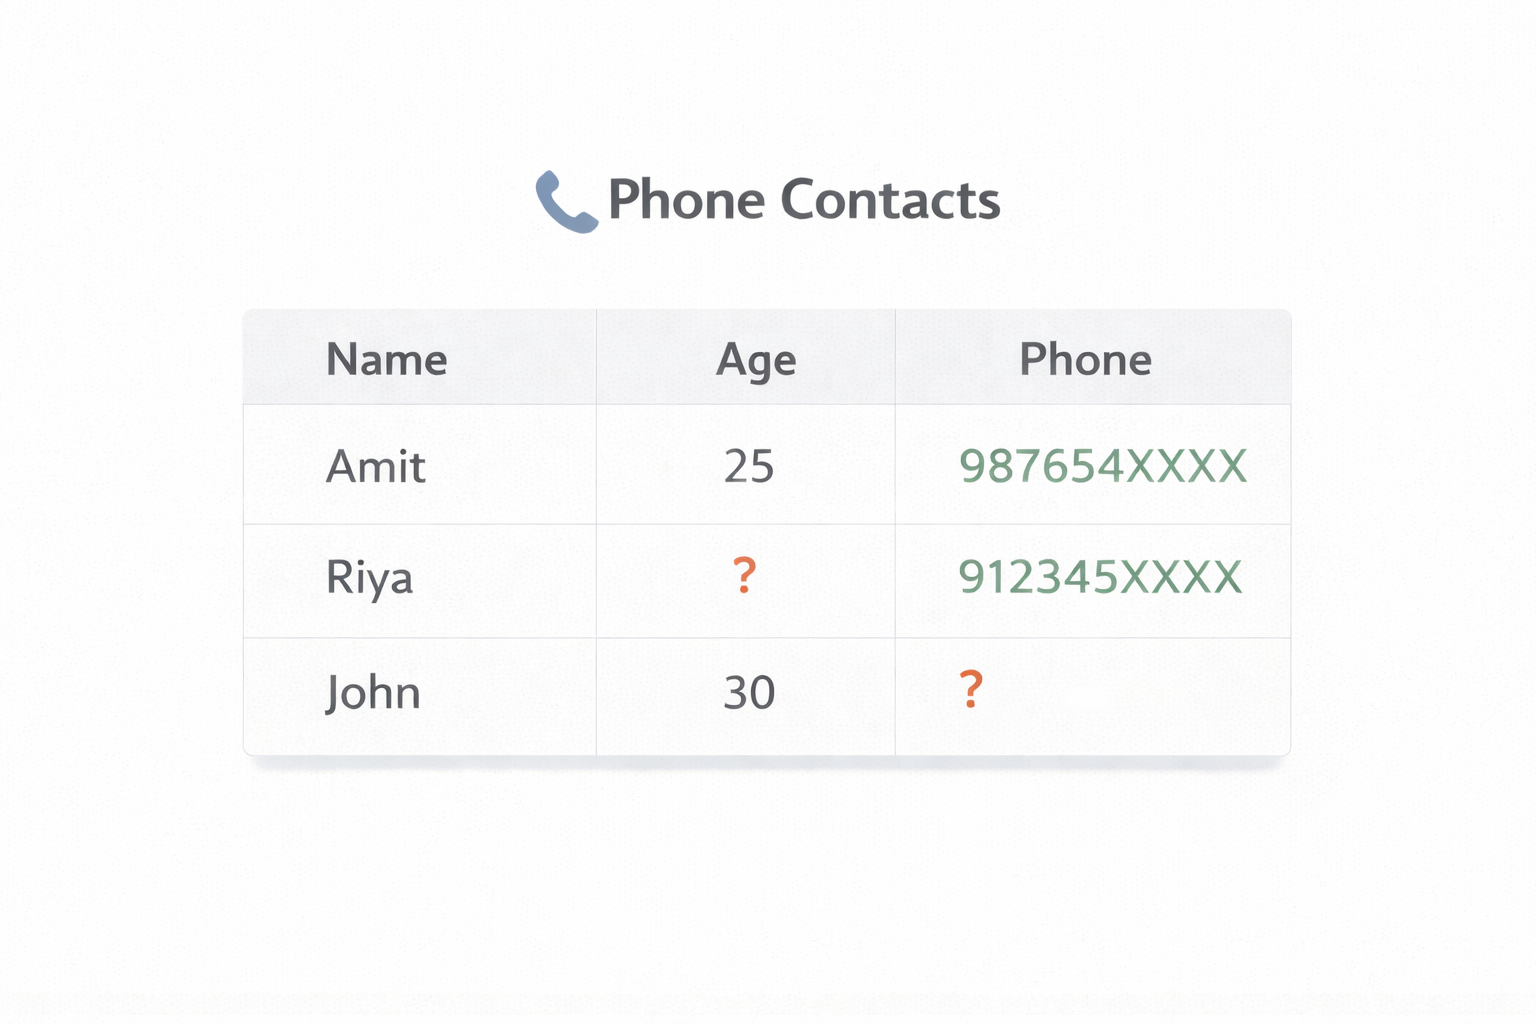

In [ ]:
'''

What is Missing values & why it occurs ?
Missing values are empty spots in your data where information is supposed to be, but is not available..
It means the data is blank, unknown, or not recorded.


🤔 Why Do Missing Values Occur?

There are many real-world reasons:

1️⃣ User Did Not Provide Information
Someone skips filling a form field.
Example: A customer doesn’t enter their phone number.

2️⃣ Data Entry Mistakes
The person entering data forgets or leaves it blank.

3️⃣ System/Technical Errors
Data can get lost because of:

    Software bugs
    File transfer problems


'''

In [1]:
import pandas as pd

In [2]:
## df = pd.read_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data_sample.csv" , encoding="latin1")

df = pd.read_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/zomato_data.csv")

In [4]:
df.head(2)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table rate  votes                           phone  \
0          Yes        Yes  4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [5]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
## takes 5-10 sec 

from langchain_groq import ChatGroq

llm = ChatGroq(
    model="openai/gpt-oss-120b", ## u can use some other models as well.. (just copy model from console.groq.com/playground)
    temperature = 0,
    groq_api_key = groq_api_key
)

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [10]:
prompt = f"""
You are a data analyst.

Suggest best missing value strategy for each column.
Dataset missing values : {df.isnull().sum().to_dict()}

Return output as JSON:
{{"column_name":"strategy"}}
"""


In [9]:
response = llm.invoke(prompt)

In [12]:
print(response.text)

{
  "index": "No action needed (no missing values).",
  "url": "No action needed (no missing values).",
  "address": "No action needed (no missing values).",
  "name": "No action needed (no missing values).",
  "online_order": "No action needed (no missing values).",
  "book_table": "No action needed (no missing values).",
  "rate": "Impute with the median rating, calculated within groups of the same `location` and `rest_type` to preserve local rating patterns.",
  "votes": "No action needed (no missing values).",
  "phone": "Replace missing values with a constant placeholder such as \"Not Provided\"; do not attempt statistical imputation because phone numbers are unique identifiers.",
  "location": "Impute with the mode (most frequent location) or, if a hierarchical location hierarchy exists, use the nearest known location based on other address fields.",
  "rest_type": "Impute with the mode (most common restaurant type) or, if possible, infer from `cuisines` and `dish_liked` using a 

# 3.. Filling Missing value ( GenAI-suggested)

In [27]:
prompt = f"""
You are a senior Data Analyst.

Task:
Write pandas code to handle missing values using best practices.

Dataset columns:
{df.columns.tolist()}

Requirement:
For column `rate`:
- Impute missing values using the **median rate**
- Median must be computed **within groups of (`location`, `rest_type`)**
- This is to preserve **local rating patterns**
- If a group median is unavailable (all missing), use the **overall median** to fill missing value

Output rules:
- Return ONLY executable beginner friendly Python(pandas) code
- No explanation, no markdown
"""


In [28]:
response = llm.invoke(prompt)

In [29]:
print(response.content)

import pandas as pd

# df is your DataFrame
# Ensure the rating column is numeric
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Overall median (used as fallback)
overall_median = df['rate'].median()

# Median within each (location, rest_type) group
group_median = df.groupby(['location', 'rest_type'])['rate'].transform('median')

# Fill missing values: first with group median, then with overall median if still missing
df['rate'] = df['rate'].fillna(group_median).fillna(overall_median)


In [ ]:
# df['rate'].median() will give error !

In [23]:
## 1) first Convert rate to numeric
df['rate'] = pd.to_numeric(df['rate'], errors = 'coerce')

In [24]:
overall_median = df['rate'].median()

In [25]:
group_median = df.groupby(['location', 'rest_type'])['rate'].transform('median')

In [26]:
group_median

0        3.8
1        3.8
2        3.8
3        3.6
4        3.8
        ... 
51712    4.0
51713    4.0
51714    4.0
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [30]:
# Fill missing values: first with group median, and if still missing then with overall median 

df['rate'] = df['rate'].fillna(group_median).fillna(overall_median)

# 4.. Outlier treatment


In [ ]:
'''

What are Outlier ?

Outliers are those values in data that are unusually high or low compared to the normal range..
Example: If most employees earn between ₹30,000–₹50,000 per month, but one salary is ₹5,00,000, that value is an outlier..



🎯 Impact of Outliers (in simple terms)
Outliers can distort your analysis and give a false picture of the data.

📉 1️⃣ Wrong Averages

If one salary is ₹5,00,000 while others are ₹30k–₹50k,
the average salary becomes much higher than reality.

You may think:
“Employees are highly paid” ❌
But actually → Just one extreme value affected the result..


'''

In [ ]:
'''
Thats why its a good idea to deal with outliers :
Lets ask genAI  , how to deal with Outliers :


'''

In [31]:
df.dtypes

index                            int64
url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [53]:
prompt = f"""
You are a data scientist.

Dataset overview :

Dataset context:
- Column: `votes`
- Sample values (first 20): {df['votes'].head(20).tolist()}
- Numeric columns to analyze: ['votes']

Task:
1) Suggest the best outlier treatment for `votes`

Output format:
- Give EXACTLY 1 line explanation for `votes` 

Then:
- Generate beginner-friendly pandas Python code to apply the chosen treatment
- Assume dataframe name is `df`

"""


In [54]:
response = llm.invoke(prompt)

In [55]:
print(response.content)

Use winsorization by capping `votes` at the 1st and 99th percentiles to limit extreme values while preserving the overall distribution.  

```python
import numpy as np
import pandas as pd

# calculate the 1st and 99th percentiles
lower_bound = df['votes'].quantile(0.01)
upper_bound = df['votes'].quantile(0.99)

# apply winsorization: values below/above the bounds are set to the bound values
df['votes'] = np.where(df['votes'] < lower_bound, lower_bound,
                      np.where(df['votes'] > upper_bound, upper_bound, df['votes']))
```


In [ ]:
'''
If u u are getting IQR based missing value stategy , that is still Okay !

'''

In [ ]:
'''
Lets consider simple example : 

Lakhs of students appear for exams like CAT or GATE every year to get admissions for MBA or for master 
but their scores are spread out.. 

Suppose Rahul’s score is at the 75th percentile — this means he scored higher than 75% of students who took the exam. 
If Ananya is at the 50th percentile (median), she performed better than half the candidates and below the other half.




'''

In [ ]:
'''
lets understand first what Quantiles are :
A way to divide data into equal percentage groups.


25th Percentile (Q1) → 25% of students scored below this mark.

50th Percentile (Q2 / Median) → Half the students scored below this mark and half scored above it.

75th Percentile (Q3) → 75% of students scored below this mark; only the top 25% scored higher.

Below Q1 → The lowest scoring 25% of students.

Between Q1 and Q3 → The middle 50% of students.

Above Q3 → The top 25% of students.

Median → The score that splits the data into two equal halves.

Quantiles → A way to divide data into equal percentage groups.


'''

In [ ]:
'''


🧠 Tiny Technical Difference (for clarity)

Percentile → Divides data into 100 equal parts
Quantile → General term for dividing data into equal parts (can be 4, 10, 100, etc.)

When we divide data into 4 parts, we call them quartiles:

Q1 = 25th percentile
Q2 = 50th percentile (median)
Q3 = 75th percentile


'''

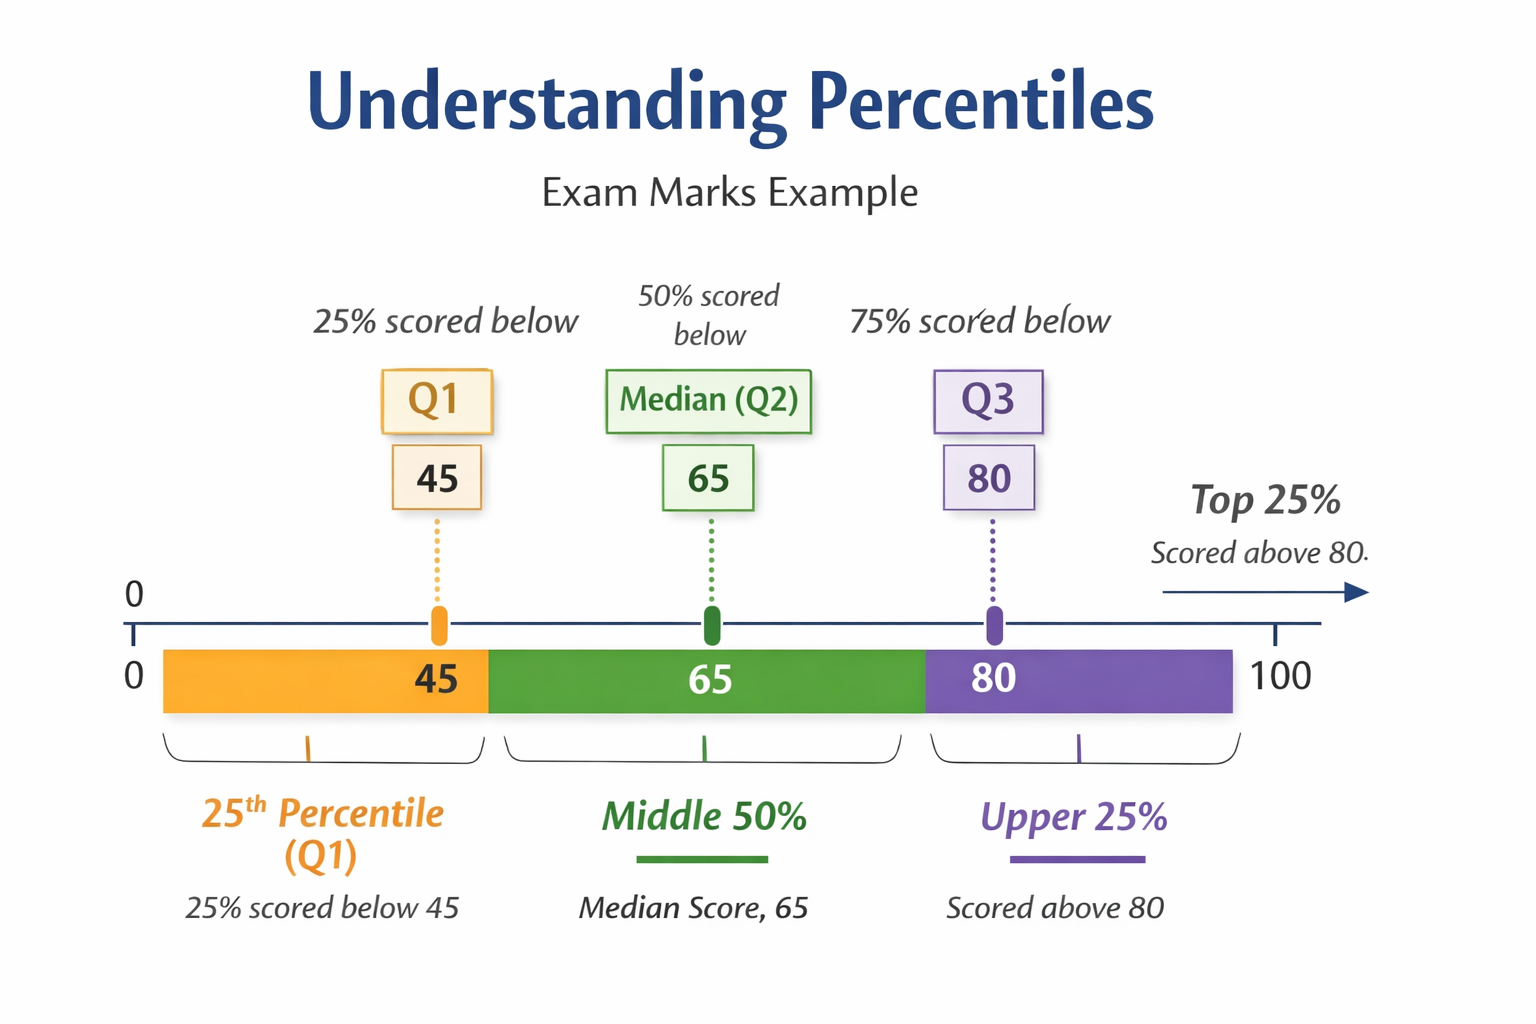

In [ ]:
'

In [41]:
# 2️⃣  Define the winsorization (capping) limits
# -------------------------------------------------

lower_q = 0.01   # 1st percentile
upper_q = 0.99   # 99th percentile

lower_bound = df['votes'].quantile(lower_q)
upper_bound = df['votes'].quantile(upper_q)

print(f"Lower bound (1%): {lower_bound:.2f}")
print(f"Upper bound (99%): {upper_bound:.2f}")

Lower bound (1%): 0.00
Upper bound (99%): 3847.84


In [43]:
# 6️⃣  If you ever prefer to *replace* extreme outliers with the median:
# -------------------------------------------------
median_val = df['votes'].median()
median_val

np.float64(41.0)

In [45]:
import numpy as np

In [46]:
df['votes_median_filled'] = np.where((df['votes'] < lower_bound) | (df['votes'] > upper_bound) , median_val , df['votes'])

# 5.. Duplicates & inconsistency !

In [56]:
print("Duplicate rows count:", df.duplicated().sum())

Duplicate rows count: 0


# 6.. Data validation rules (AI suggested)


In [ ]:
'''

Data validation means checking data before analysis/modeling so that:

    wrong values don’t enter dashboard/model
    outliers / typos / invalid categories are caught early
    data becomes reliable


We will give dataset summary to GenAI and ask for rules..

✅ Validation Rules Examples (Zomato specific)
1) Numeric rules

    votes >= 0
    rate between 1 and 5
    approx_cost(for two people) > 0


2) Categorical rules

    online_order must be only : Yes/No
    book_table must be only : Yes/No
    location must not be null
    rest_type should not be empty
    
    
3) Text rules

    url must start with http
    name length > 2
    address should contain at least 1 number or street info (soft rule)




'''

In [57]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'votes_median_filled'],
      dtype='object')

In [58]:
prompt = f"""
You are a senior Data Quality Engineer.

Task:
Suggest data validation rules for a Zomato restaurant dataset.

Dataset schema:
Columns: {df.columns.tolist()}

Data sample (5 rows):
{df.head(5).to_dict(orient='records')}

Output format:
Return ONLY a JSON list of rules.
Each rule must have these keys:
- column
- rule_name
- rule_logic
- severity level (LOW/MEDIUM/HIGH)
- fix_suggestion

Rules should cover:
- numeric ranges
- allowed categories
- null checks
- basic format checks (url/phone)
No extra text outside JSON.


"""


In [62]:
## takes 5-10 sec 

from langchain_groq import ChatGroq

llm = ChatGroq(
    model="meta-llama/llama-4-scout-17b-16e-instruct", ## u can use some other models as well.. (just copy model from console.groq.com/playground)
    temperature = 0,
    groq_api_key = groq_api_key
)

In [63]:
response = llm.invoke(prompt)

In [65]:
print(response.content)

[
  {
    "column": "rate",
    "rule_name": "Rate Range Check",
    "rule_logic": "rate >= 0 and rate <= 5",
    "severity_level": "LOW",
    "fix_suggestion": "Ensure rate is between 0 and 5"
  },
  {
    "column": "votes",
    "rule_name": "Votes Range Check",
    "rule_logic": "votes >= 0",
    "severity_level": "LOW",
    "fix_suggestion": "Ensure votes is non-negative"
  },
  {
    "column": "approx_cost(for two people)",
    "rule_name": "Approx Cost Range Check",
    "rule_logic": "approx_cost(for two people) >= 0",
    "severity_level": "LOW",
    "fix_suggestion": "Ensure approx_cost(for two people) is non-negative"
  },
  {
    "column": "online_order",
    "rule_name": "Online Order Category Check",
    "rule_logic": "online_order in ['Yes', 'No']",
    "severity_level": "MEDIUM",
    "fix_suggestion": "Ensure online_order is either 'Yes' or 'No'"
  },
  {
    "column": "book_table",
    "rule_name": "Book Table Category Check",
    "rule_logic": "book_table in ['Yes', 'No'

# 7.. Auto “Data Quality Report” generator !

In [ ]:
'''

Generate full report: Missing, Duplicates, Outliers, Inconsistencies
Save report as txt/pdf

'''

In [66]:
profile = {
    "rows": df.shape[0],
    "columns": df.shape[1],
    "column_names": list(df.columns),
    "missing_values": df.isnull().sum().to_dict(),
    "duplicate_rows": int(df.duplicated().sum()),
    "basic_stats": df.describe(include="all").to_dict()
}


In [69]:
prompt = f"""
You are a Data Quality Engineer.

Write a short "Data Quality Report" in simple English.

Dataset profile:
{profile}

Report must include:
1) Overview
2) Missing Values
3) Duplicates
4) Outliers
5) Inconsistency
6) Final recommended fixes

Keep it short and beginner-friendly..

"""

In [73]:
response = llm.invoke(prompt)
report = response.content
print(report)

**Data Quality Report**

**Overview**
-----------

We analyzed a dataset with 51,717 rows and 19 columns. The data appears to be about restaurants, with information on their names, addresses, ratings, and more.

**Missing Values**
----------------

We found missing values in the following columns:

* `phone`: 1,208 (2.3% missing)
* `location`: 21 (0.04% missing)
* `rest_type`: 227 (0.4% missing)
* `dish_liked`: 28,078 (54.2% missing)
* `approx_cost(for two people)`: 346 (0.7% missing)
* `cuisines`: 45 (0.1% missing)

**Duplicates**
-------------

There are **no duplicate rows** in the dataset.

**Outliers**
---------

We found some extreme values in the `votes` and `rate` columns:

* `votes`: min=0, max=16,832, mean=283.7, std=803.8
* `rate`: min=1.8, max=4.9, mean=3.68, std=0.41

These values seem reasonable for a restaurant dataset.

**Inconsistency**
--------------

We noticed that some columns have inconsistent data types:

* `online_order` and `book_table` have only 2 unique value

In [ ]:
## ✅ Save Data Quality Report

In [74]:
with open(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/zoamto_data_quality_report.txt", "w", encoding="utf-8") as f:
    f.write(report)